## Ch1 - Exploratory Data Analysis
In this notebook, we will learn how to explore a given dataset. EDA is the most fundamental part and the very first thing which we need to do in any data project.

In nutshell, I can say that the very first thing in a ML project is to know the data and get familiar with it. To do this, we use Statistics to explore the data. We try to find out -
1. Type of data e.g. numerical, categorical and further types
2. Location estimates e.g. mean, median etc
3. Variability estimates e.g. variance, std deviation, MAD, IQR, quantiles etc
4. Plot some graphs to get a visual appeal from the data e.g. Box plot, scatter plot, histograms etc.

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from scipy import stats

In [ ]:
DATA = '../_data/'

In [12]:
# Import the required data
AIRLINE_STATS_CSV = DATA  + 'airline_stats.csv'
KC_TAX_CSV = DATA + 'kc_tax.csv.gz'
LC_LOANS_CSV = DATA + 'lc_loans.csv'
AIRPORT_DELAYS_CSV = DATA + 'dfw_airline.csv'
SP500_DATA_CSV = DATA + 'sp500_data.csv.gz'
SP500_SECTORS_CSV = DATA + 'sp500_sectors.csv'
STATE_CSV = DATA + 'state.csv'

## Estimates of Location

### Example - Location Est of Population and Murder Rates

In [13]:
state = pd.read_csv(STATE_CSV)

In [14]:
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


First we calculate `mean` `median` and `trimmed mean` for the `Population`

#### Mean

In [16]:
print("Mean population", state['Population'].mean())

Mean population 6162876.3


In [17]:
np.mean(state['Population'])

np.float64(6162876.3)

For trimmed mean, we will use `scipy` because none of pandas or numpy support it out of the box.

In [20]:
print("Trimmed mean for population: ", stats.trim_mean(state['Population'], 0.1)) # 10% of the population is cut from both ends

Trimmed mean for population:  4783697.125


#### Median

In [22]:
print("Median for population data: ", state["Population"].median())

Median for population data:  4436369.5


## Estimates of Variability

#### Standard Deviation

In [23]:
print("Std Deviation of Population data: ", state['Population'].std())

Std Deviation of Population data:  6848235.347401142


#### IQR

In [24]:
print("IQR of population :", state['Population'].quantile(0.75) - state['Population'].quantile(0.25))

IQR of population : 4847308.0


#### Percentiles and Boxplots

In [26]:
print(state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64


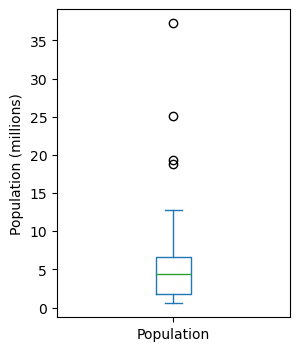

In [28]:
ax = (state['Population']/1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel('Population (millions)')

plt.show()

#### Frequency table and Histogram

`value_counts()` will work by default with categorical variables. It will print frequency table.

But for numerical data, we need to first convert it into categorical data like some bins and then print its frequency table.

In [30]:
binned_population = pd.cut(state['Population'], bins=10) # bins 10 means split the data into 10 bins and decide the binsize accordingly
print(binned_population.value_counts())

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64


In [31]:
binned_population.name = 'binnedPopulation'
df = pd.concat([state, binned_population], axis=1)
df = df.sort_values(by='Population')

groups = []
for group, subset in df.groupby(by='binnedPopulation', observed=False):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
print(pd.DataFrame(groups))

                   BinRange  Count  \
0    (526935.67, 4232659.0]     24   
1    (4232659.0, 7901692.0]     14   
2   (7901692.0, 11570725.0]      6   
3  (11570725.0, 15239758.0]      2   
4  (15239758.0, 18908791.0]      1   
5  (18908791.0, 22577824.0]      1   
6  (22577824.0, 26246857.0]      1   
7  (26246857.0, 29915890.0]      0   
8  (29915890.0, 33584923.0]      0   
9  (33584923.0, 37253956.0]      1   

                                              States  
0  WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N...  
1          KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA  
2                                  VA,NJ,NC,GA,MI,OH  
3                                              PA,IL  
4                                                 FL  
5                                                 NY  
6                                                 TX  
7                                                     
8                                                     
9                              

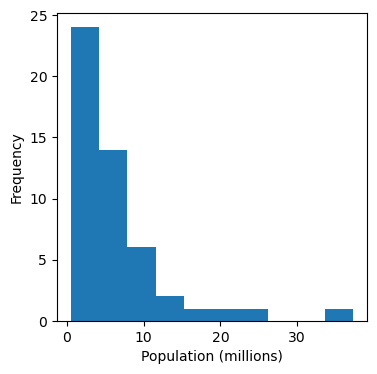

In [34]:
ax = (state['Population']/1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')
plt.show()

#### Density Estimates

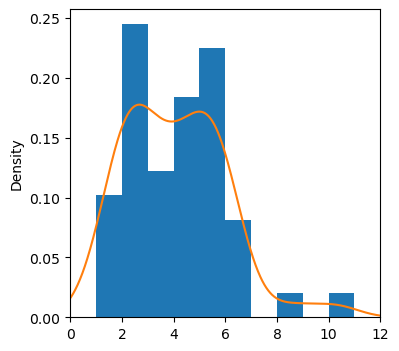

In [36]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0, 12], bins=range(1, 12), figsize=(4, 4))

# to show the density curve
state['Murder.Rate'].plot.density(ax=ax)
plt.show()